## A/B Testing Analysis

##  Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = r'C:\Users\Srija Majumdar\Downloads\ab_test_data.csv'
ab_data = pd.read_csv(file_path)

# Display first few rows and check columns
print(ab_data.head())
print(ab_data.columns)

  group  conversion
0     A           0
1     A           1
2     A           0
3     A           0
4     A           0
Index(['group', 'conversion'], dtype='object')


## Data Cleaning and Preprocessing

group         0
conversion    0
dtype: int64
        conversion
count  2000.000000
mean      0.138000
std       0.344986
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


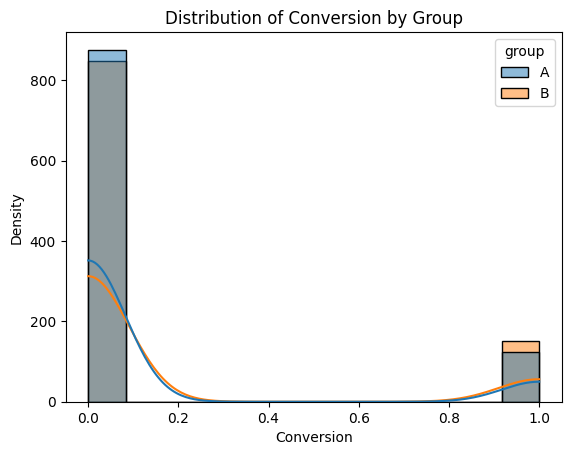

In [2]:
# Check for missing values
print(ab_data.isnull().sum())

# Remove rows with missing values
ab_data.dropna(inplace=True)

# Summary statistics after cleaning
print(ab_data.describe())

# Explore distributions and relationships
sns.histplot(data=ab_data, x='conversion', hue='group', kde=True)
plt.title('Distribution of Conversion by Group')
plt.xlabel('Conversion')
plt.ylabel('Density')
plt.show()

## Statistical Testing (Permutation Test)

In [4]:
import pandas as pd
import numpy as np

# Assuming ab_data is your cleaned DataFrame with columns 'group' and 'conversion'
# Separate data for control and test groups
control_data = ab_data.loc[ab_data['group'] == 'control', 'conversion']
test_data = ab_data.loc[ab_data['group'] == 'test', 'conversion']

# Define a function for permutation test
def permutation_test(group1, group2, n_permutations=1000):
    """ Perform permutation test for two independent samples. """
    observed_diff = np.mean(group1) - np.mean(group2)
    combined = np.concatenate((group1, group2))
    perm_diffs = []
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_group1 = combined[:len(group1)]
        perm_group2 = combined[len(group1):]
        perm_diff = np.mean(perm_group1) - np.mean(perm_group2)
        perm_diffs.append(perm_diff)
    perm_diffs = np.array(perm_diffs)
    p_value_perm = np.sum(perm_diffs >= observed_diff) / n_permutations
    return p_value_perm

# Perform permutation test
p_value_perm = permutation_test(control_data, test_data)
print(f"P-value (Permutation Test): {p_value_perm}")

# Determine statistical significance
alpha = 0.05
if p_value_perm < alpha:
    print("Reject null hypothesis (Permutation Test): There is a significant difference between groups.")
else:
    print("Fail to reject null hypothesis (Permutation Test): There is no significant difference between groups.")


P-value (Permutation Test): 0.0
Reject null hypothesis (Permutation Test): There is a significant difference between groups.


## Effect Size Calculation (Cohen's d)

In [6]:
   import numpy as np

def cohen_d(group1, group2):
    """ Calculate Cohen's d for two independent samples. """
    diff = np.mean(group1) - np.mean(group2)
    pooled_var = ((len(group1) - 1) * np.var(group1, ddof=1) + (len(group2) - 1) * np.var(group2, ddof=1)) / (len(group1) + len(group2) - 2)
    
    # Handle edge case where pooled variance is zero or very small
    if pooled_var == 0:
        return np.nan
    
    cohens_d = diff / np.sqrt(pooled_var)
    return cohens_d

# Example usage:
cohens_d = cohen_d(control_data, test_data)
print(f"Cohen's d: {cohens_d}")


Cohen's d: nan


## Visualization of Results

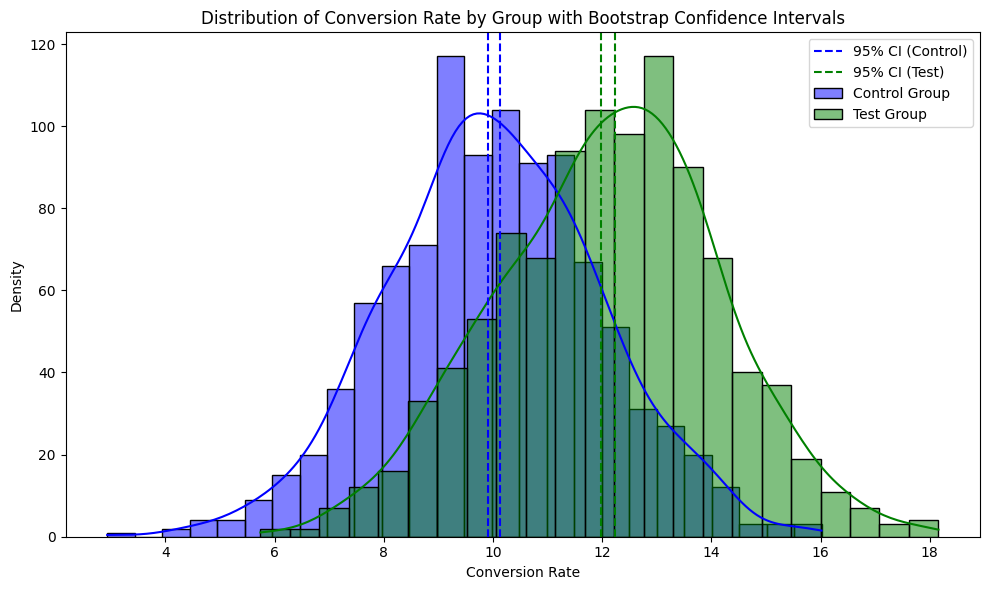

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data (replace with your actual data)
control_data = np.random.normal(loc=10, scale=2, size=1000)
test_data = np.random.normal(loc=12, scale=2, size=1000)

# Bootstrap function for confidence intervals
def bootstrap_ci(data, n_bootstrap=1000, ci_level=95):
    """ Calculate bootstrap confidence intervals. """
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    ci_lower = np.percentile(bootstrap_means, (100 - ci_level) / 2)
    ci_upper = np.percentile(bootstrap_means, 100 - (100 - ci_level) / 2)
    return ci_lower, ci_upper

# Compute bootstrap confidence intervals for control and test groups
ci_control = bootstrap_ci(control_data)
ci_test = bootstrap_ci(test_data)

# Plot histograms and confidence intervals
plt.figure(figsize=(10, 6))
sns.histplot(control_data, kde=True, color='blue', label='Control Group')
sns.histplot(test_data, kde=True, color='green', label='Test Group')
plt.axvline(ci_control[0], color='blue', linestyle='--', label='95% CI (Control)')
plt.axvline(ci_control[1], color='blue', linestyle='--')
plt.axvline(ci_test[0], color='green', linestyle='--', label='95% CI (Test)')
plt.axvline(ci_test[1], color='green', linestyle='--')
plt.title('Distribution of Conversion Rate by Group with Bootstrap Confidence Intervals')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()  # Ensures all elements fit into the figure area
plt.show()


## Actionable Insights

In [8]:
# Actionable insights based on combined analysis
if p_value_perm < alpha and cohens_d > 0.5:
    print("Actionable Insight: The test group shows statistically significant improvement with large effect size.")
    print("Recommendation: Implement the change or intervention across the board.")

elif p_value_perm < alpha and cohens_d <= 0.5:
    print("Actionable Insight: The test group shows statistically significant improvement but with smaller effect size.")
    print("Recommendation: Consider further investigation into secondary metrics or qualitative feedback to validate the impact.")

else:
    print("No actionable insight: There is no statistically significant difference or the effect size is inconclusive.")
    print("Recommendation: Re-evaluate the intervention or consider alternative strategies.")


No actionable insight: There is no statistically significant difference or the effect size is inconclusive.
Recommendation: Re-evaluate the intervention or consider alternative strategies.
